This section describes how to use the model provided with this package, using a simple training scenario as an example.

We consider a Fourier series with $n$ frequencies defined as follows:
$$
f(x, \boldsymbol{\theta})=\sum_{\boldsymbol{\omega} \in \boldsymbol{\Omega}} c_{\boldsymbol{\omega}}(\boldsymbol{\theta}) e^{i \boldsymbol{\omega} x}=\sum_{\boldsymbol{\omega} \in \boldsymbol{\Omega}} c_{\boldsymbol{\omega}}(\boldsymbol{\theta}) \left(\cos(\boldsymbol{\omega} x) + i \sin(\boldsymbol{\omega} x)\right)
$$
Here, $c_{\boldsymbol{\omega}}(\boldsymbol{\theta})$ are the Fourier coefficients of the Fourier series, parameterized by the set of trainable parameters $\boldsymbol{\theta}$ and $\omega \in \boldsymbol{\Omega}$ is the corresponding frequency.

As shown by [Schuld et al. (2020)](https://arxiv.org/abs/2008.08605), we can find a quantum circuit that takes a vector of trainable parameters and an input $x$ and formulate it as a Fourier series of the form above.

Therefore, training such a model on a Fourier series is a proof-of-concept which we want to demonstrate here.

Let's start with building our dataset. A Fourier series with $4$ frequencies:

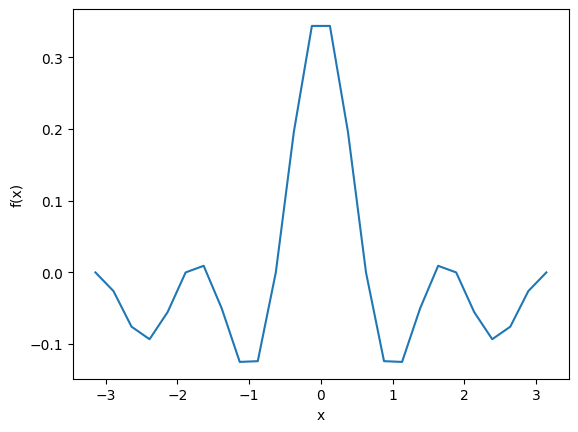

In [1]:
import numpy as np
import matplotlib.pyplot as plt

domain = [-np.pi, np.pi]
omegas = np.array([1, 2, 3, 4])
coefficients = np.array([0.5, 0.5, 0.5, 0.5])

# Calculate the number of required samples to satisfy the Nyquist criterium
n_d = int(np.ceil(2 * np.max(np.abs(domain)) * np.max(omegas)))
# Sample the domain linearly
x = np.linspace(domain[0], domain[1], num=n_d)

# define our Fourier series f(x)
def f(x):
    return 1 / np.linalg.norm(omegas) * np.sum(coefficients * np.cos(omegas.T * x))

# evaluate f(x) on the domain samples
y = np.stack([f(sample) for sample in x])

plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.show()


Note that we chose the coefficients to be all $0.5$. Play around with those values to change the magnitude of each frequency component.
Now that we have our "dataset", let's move on and build a model:

In [2]:
from qml_essentials.model import Model

model = Model(
    n_qubits=4,
    n_layers=1,
    circuit_type="Hardware_Efficient",
)

This is the minimal amout of information needed. According to the work referenced above, a model with $4$ qubits should be capable of learning a Fourier series with $4$ frequencies, considering single qubit Pauli encoding (which we have by default).

Now, let's train our model:

In [11]:
import pennylane as qml

opt = qml.AdamOptimizer(stepsize=0.01)

def cost_fct(params):
    y_hat = model(params=params, inputs=x, force_mean=True)

    return np.mean((y_hat._value - y) ** 2)

for epoch in range(100):
    model.params, cost_val = opt.step_and_cost(cost_fct, model.params)

    if epoch % 10 == 0:
        print(f"Epoch: {epoch}, Cost: {cost_val}")

plt.plot(x, y, label="True function")
plt.plot(x, model(params=model.params, inputs=x, force_mean=True), label="Model prediction")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.show()

/home/lc3267/Documents/CodeWorkspace/entangling-the-waves/.venv/lib/python3.11/site-packages/autograd/tracer.py:14: UserWarning: Output seems independent of input.
  warnings.warn("Output seems independent of input.")


Epoch: 0, Cost: 0.03820881216183916


/home/lc3267/Documents/CodeWorkspace/entangling-the-waves/.venv/lib/python3.11/site-packages/autograd/tracer.py:14: UserWarning: Output seems independent of input.
  warnings.warn("Output seems independent of input.")
/home/lc3267/Documents/CodeWorkspace/entangling-the-waves/.venv/lib/python3.11/site-packages/autograd/tracer.py:14: UserWarning: Output seems independent of input.
  warnings.warn("Output seems independent of input.")
/home/lc3267/Documents/CodeWorkspace/entangling-the-waves/.venv/lib/python3.11/site-packages/autograd/tracer.py:14: UserWarning: Output seems independent of input.
  warnings.warn("Output seems independent of input.")
/home/lc3267/Documents/CodeWorkspace/entangling-the-waves/.venv/lib/python3.11/site-packages/autograd/tracer.py:14: UserWarning: Output seems independent of input.
  warnings.warn("Output seems independent of input.")
/home/lc3267/Documents/CodeWorkspace/entangling-the-waves/.venv/lib/python3.11/site-packages/autograd/tracer.py:14: UserWarning:

KeyboardInterrupt: 